# Python: Introduction to Machine Learning

## Import Libraries 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder  
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm

%matplotlib inline 
# Display Matplotlib graphs within the Notebook (and note as separate window pop-ups)

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.simplefilter(action='ignore',category=DataConversionWarning)

## Import Data 

In [2]:
df = pd.read_csv('Data/loan_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

## Exploratory Data Analysis (EDA)

In [4]:
# Display data about the data (nulls, data types, rows/columns, etc.)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Display statistical summary for the data 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Check for missing Values
df.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Model Development

### Data Preparation

In [7]:
# remove all null values
df.dropna(inplace=True)

In [8]:
#Confirm it worked
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
#Check for duplicate entries
df.duplicated().any()

False

In [10]:
#What's the shape of the new data?
df.shape

(480, 13)

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


### Data Visualization

Loan_Status    N    Y
Gender               
Female        32   54
Male         116  278


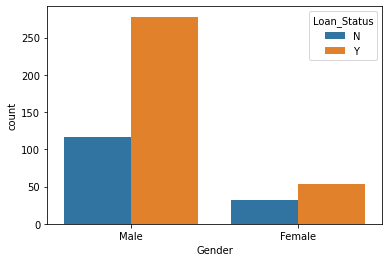

In [12]:
# Let's understand how different
print(pd.crosstab(df['Gender'],df['Loan_Status']))

sns.countplot(df['Gender'],hue=df['Loan_Status'])
plt.show()


In [13]:
print(pd.crosstab(df['Gender'], df['Loan_Status']).apply(lambda r: round(r/r.sum(),3)*100, axis=1))

Loan_Status     N     Y
Gender                 
Female       37.2  62.8
Male         29.4  70.6


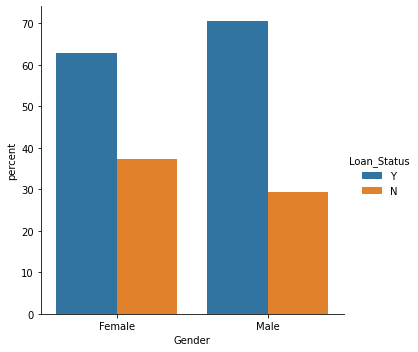

In [14]:
df_pct = df.groupby('Gender')['Loan_Status'].value_counts(normalize=True)
df_pct = df_pct.mul(100)
df_pct = df_pct.rename('percent').reset_index()

sns.catplot(x='Gender',y='percent',hue='Loan_Status',kind='bar',data=df_pct)
plt.show()

In [15]:
# Let's write this as a method to make it easy to check the loan status against all the parameters
def column_bar(df, column):
    print(pd.crosstab(df[column],df['Loan_Status']))
    print('Percentage')
    print(pd.crosstab(df[column], df['Loan_Status']).apply(lambda r: round(r/r.sum(),3)*100, axis=1))
    sns.countplot(df[column],hue=df['Loan_Status'])
    plt.show()
    df_pct = df.groupby(column)['Loan_Status'].value_counts(normalize=True)
    df_pct = df_pct.mul(100)
    df_pct = df_pct.rename('percent').reset_index()

    sns.catplot(x=column,y='percent',hue='Loan_Status',kind='bar',data=df_pct)
    plt.show()

Loan_Status    N    Y
Gender               
Female        32   54
Male         116  278
Percentage
Loan_Status     N     Y
Gender                 
Female       37.2  62.8
Male         29.4  70.6


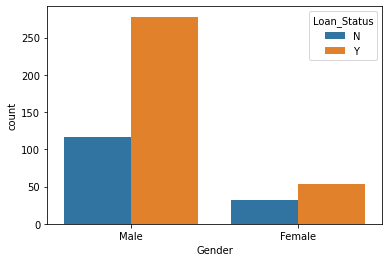

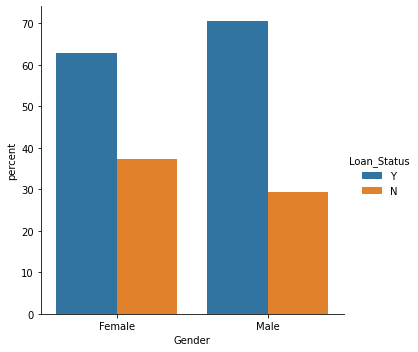

In [16]:
column_bar(df, 'Gender')

In [17]:
#Select the data we want to test
columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']

Loan_Status    N    Y
Gender               
Female        32   54
Male         116  278
Percentage
Loan_Status     N     Y
Gender                 
Female       37.2  62.8
Male         29.4  70.6


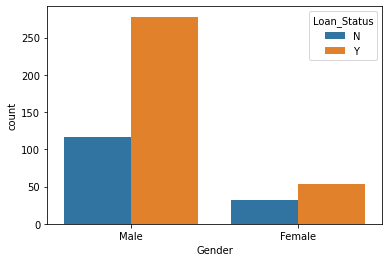

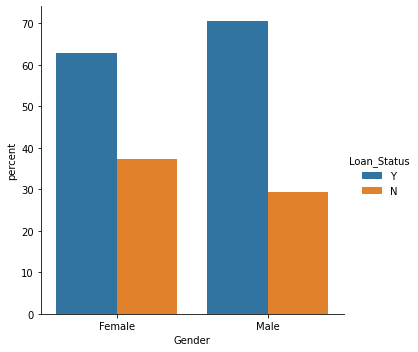

Loan_Status   N    Y
Married             
No           64  105
Yes          84  227
Percentage
Loan_Status     N     Y
Married                
No           37.9  62.1
Yes          27.0  73.0


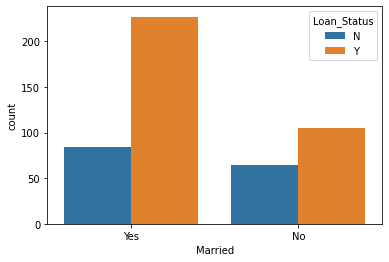

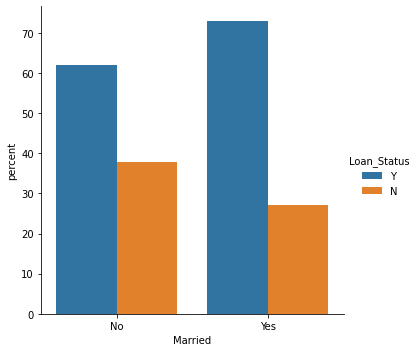

Loan_Status   N    Y
Dependents          
0            87  187
1            28   52
2            20   65
3+           13   28
Percentage
Loan_Status     N     Y
Dependents             
0            31.8  68.2
1            35.0  65.0
2            23.5  76.5
3+           31.7  68.3


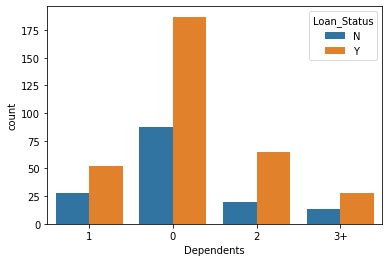

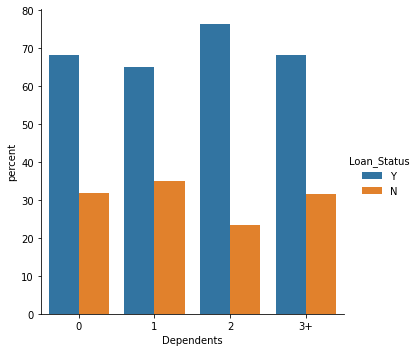

Loan_Status     N    Y
Education             
Graduate      112  271
Not Graduate   36   61
Percentage
Loan_Status      N     Y
Education               
Graduate      29.2  70.8
Not Graduate  37.1  62.9


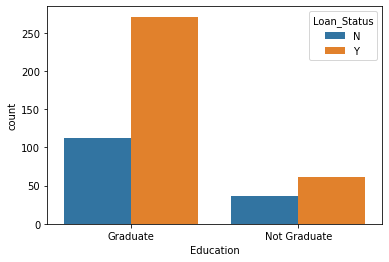

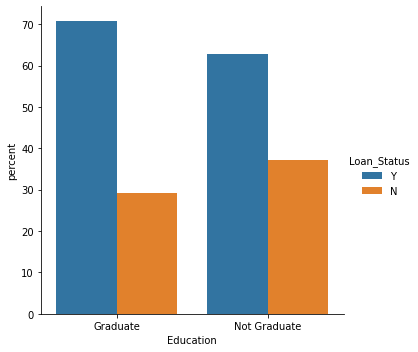

Loan_Status      N    Y
Self_Employed          
No             125  289
Yes             23   43
Percentage
Loan_Status       N     Y
Self_Employed            
No             30.2  69.8
Yes            34.8  65.2


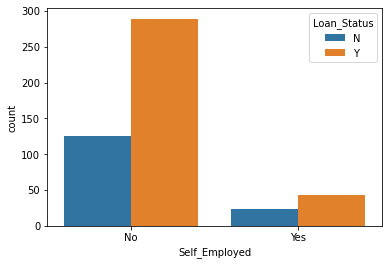

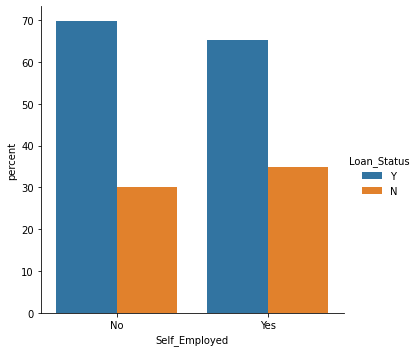

Loan_Status     N    Y
Property_Area         
Rural          54   85
Semiurban      42  149
Urban          52   98
Percentage
Loan_Status       N     Y
Property_Area            
Rural          38.8  61.2
Semiurban      22.0  78.0
Urban          34.7  65.3


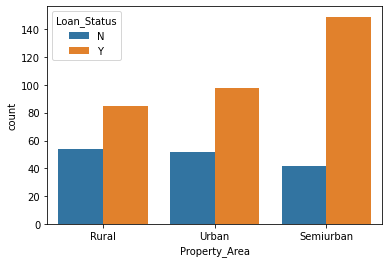

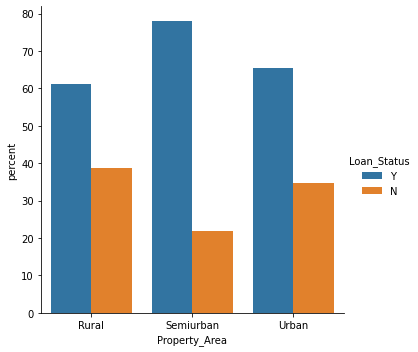

Loan_Status      N    Y
Credit_History         
0.0             63    7
1.0             85  325
Percentage
Loan_Status        N     Y
Credit_History            
0.0             90.0  10.0
1.0             20.7  79.3


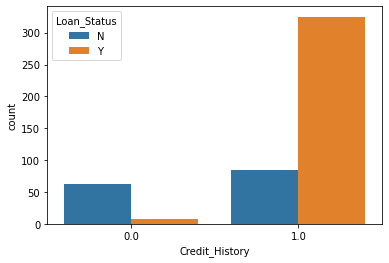

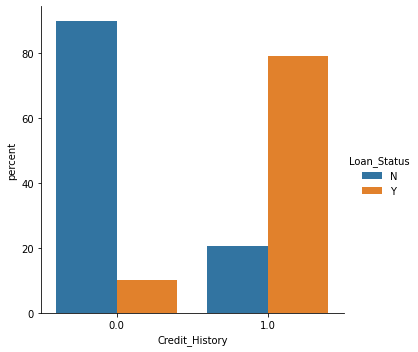

In [18]:
for column in columns:
    column_bar(df,column)

In [19]:
# Check Continuous variables
def column_scatter(df,column):
    plt.scatter(df[column], df['Loan_Status']);
    plt.title(column)
    plt.show()

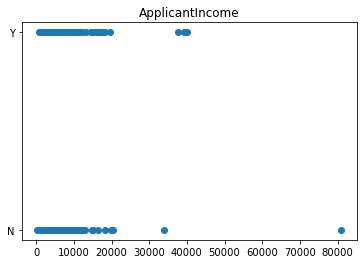

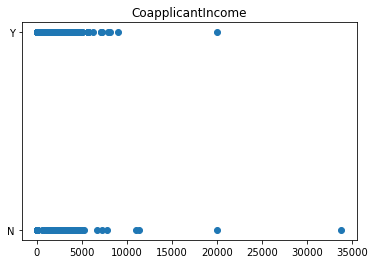

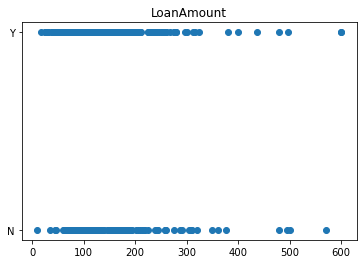

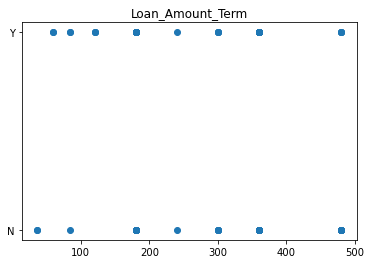

In [20]:
# ApplicantIncome
# CoapplicantIncome
# LoanAmount
# Loan_Amount_Term

scatter_columns= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for column in scatter_columns:
    column_scatter(df,column)

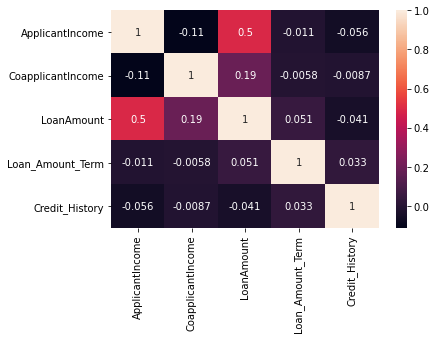

In [21]:
# Let's look at correlation next
sns.heatmap(df.corr(),annot=True)

In [22]:
# We need to replace string data (e.g. Y,N), with numbers
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder  
les = []
non_numerical = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

for column in non_numerical:
    le = LabelEncoder()
    print(le.fit(df[column]).classes_)
    df[column] = le.fit_transform(df[column])
    les.append(le)

['Female' 'Male']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Rural' 'Semiurban' 'Urban']


In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


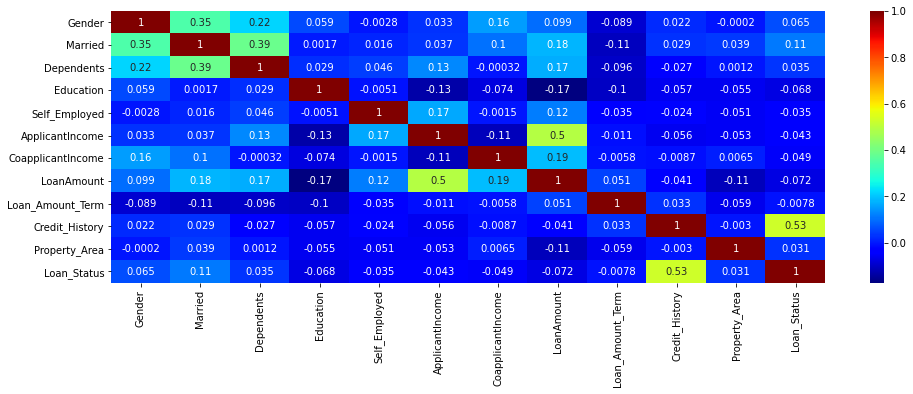

In [25]:
# Heatmap Again
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True,cmap='jet')

### Model Creation

In [26]:
# Obvious parameter to drop
df.drop('Loan_ID', axis=1, inplace=True)

In [27]:
# Separate data into target and features
Y = df['Loan_Status'].to_frame()
X = df.drop(columns=['Loan_Status'])

In [28]:
validation_size = 0.25
seed = 12
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y,test_size=validation_size,random_state=seed)

In [29]:
print(X_train.shape)
print(Y_validation.shape)

(360, 11)
(120, 1)


In [37]:
# Load ML algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB

In [38]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
nb =  GaussianNB()
lda = LDA()
models = [dt,knn,svc,nb,lda]

### Model Evaluation

In [39]:
for model in models:
    model.fit(X_train, Y_train)
    print(model)
    print(model.score(X_validation,Y_validation))

DecisionTreeClassifier()
0.7416666666666667
KNeighborsClassifier()
0.65
SVC()
0.65
GaussianNB()
0.7666666666666667
LinearDiscriminantAnalysis()
0.7583333333333333


## Hyperparamater Tuning

## Model Testing

In [33]:
# Load Test Data
test_df = pd.read_csv('Data/loan_test.csv')
# Have to perform all the same processing
# remove all null values
test_df.dropna(inplace=True)
test_df.drop('Loan_ID', axis=1, inplace=True)
for column in non_numerical:
    print(le.fit(test_df[column]).classes_)
    test_df[column] = le.fit_transform(test_df[column])

['Female' 'Male']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Rural' 'Semiurban' 'Urban']


In [34]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2


In [35]:
dt.predict(test_df)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

## Considerations 
 - Test out different algorithms -> Random Forest for Regression 
 - Iterate over the feature selection process 
 - Feature Engineering: Develop your own features from the available data 
